<a href="https://colab.research.google.com/github/vlordier/colabs/blob/main/Chandler_model_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection.git

Cloning into 'News-Headlines-Dataset-For-Sarcasm-Detection'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (66/66), done.


In [ ]:
!git clone https://github.com/rajlm10/Chandler.git

Cloning into 'Chandler'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 82 (delta 30), reused 33 (delta 3), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [ ]:
!git clone https://github.com/DTrimarchi10/confusion_matrix.git

Cloning into 'confusion_matrix'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), done.


In [ ]:
!pip install -r /content/Chandler/requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 18 kB/s 
     |████████████████████████████████| 462 kB 42.6 MB/s 
     |████████████████████████████████| 3.8 MB 38.7 MB/s 
     |████████████████████████████████| 2.9 MB 34.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=95b69225ea3f966bd26879178a0e3226863dcf5626a046555e171a9347e5427f
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [ ]:
!pip install keras==2.4.0

     |████████████████████████████████| 170 kB 12.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


**RESTART RUNTIME HERE AND THEN RUN ALL THE CODEBLOCKS AFTER THIS BLOCK**

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from confusion_matrix import cf_matrix
import re
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import time
import pickle
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%cd /content/Chandler/

/content/Chandler


In [ ]:
# function for decontracting the text data so that it can be fed to the model
# and trained properly

def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s$", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
stopwords_english = set(stopwords.words('english'))-set(['No','no','not','Not'])

In [ ]:
# function for pre-processing the text data so that it can be fed to the model
# and trained properly

def preprocess(text,stopwords=stopwords_english):
    lemmatizer = WordNetLemmatizer()


    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    #Decontract texts
    text=decontract(text)
    # tokenize texts


    texts_clean = []
    for word in text.split():
        if (word not in stopwords_english and  # remove stopwords
                word not in set(string.punctuation)-set(['!','?','.','@',':'])):  # remove punctuation
            #Lemmatize word 
            lem_word = lemmatizer.lemmatize(word,"v")  # Lemmatizing word
            texts_clean.append(lem_word)

    return " ".join(texts_clean)

In [ ]:
# reading the data for training

df1 = pd.read_json("/content/News-Headlines-Dataset-For-Sarcasm-Detection/Sarcasm_Headlines_Dataset.json", lines=True) #Reading the dataframe
df1 = df1[['headline','is_sarcastic']]

In [ ]:
#Undersampling 10 percent of the sarcastic comments. This improved the f1-score after conducting a few experiments.

df = df1.drop(df1[df1['is_sarcastic']==1].sample(frac=0.10).index) 
df = df.reset_index()

In [ ]:
#Transform the inputs and also split the data into training and test sets.
#I have used a split of 80-20 to make sure our model learns better since it is deep.

inputs=list(df['headline'].apply(lambda x: preprocess(x)))
labels=list(df['is_sarcastic'])
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2)

In [ ]:
#Tokenizing using subwords as opposed to characters or entire words. This helps improve performance and was used while training BERT ,
#The maxlen of 50 has been experimentally chosen and is shorter than a few of the longest training inputs. This was done 
# as most inputs are within this length and we can train faster.

def subword_tokenize(train_corpus, vocab_size=2**14, max_length=50,tokenizer=None):
  # Create the vocabulary using Subword tokenization
  if(tokenizer==None):
    tokenizer_corpus = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(train_corpus, target_vocab_size=2**14)
  else:
    tokenizer_corpus=tokenizer
  # Get the final vocab size
  vocab_size = tokenizer_corpus.vocab_size 
  
  # Tokenize the corpus
  sentences = [tokenizer_corpus.encode(sentence) for sentence in train_corpus]

  #Pad the sentences with 0s upto a length of 50
  sentences = tf.keras.preprocessing.sequence.pad_sequences(sentences,value=0,padding='post',maxlen=50)
  
  return sentences, tokenizer_corpus, vocab_size

In [ ]:
tokenized_inputs, tokenizer, vocab_size = subword_tokenize(train_corpus=X_train)
tokenized_test_inputs, _, vocab_size2 = subword_tokenize(X_test, tokenizer=tokenizer)

In [ ]:
# Define a dataset 
# A batch size of 128 has been chosen for the task

dataset = tf.data.Dataset.from_tensor_slices((tokenized_inputs, y_train))
dataset = dataset.shuffle(len(tokenized_inputs), reshuffle_each_iteration=True).batch(128, drop_remainder=True)

dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Implemented based on the Attention is all you need paper.

def scaled_dot_product_attention(queries, keys, values, mask):
    # Calculating  QK.T
    product = tf.matmul(queries, keys, transpose_b=True)
    # Get the scale factor
    keys_dim = tf.cast(tf.shape(keys)[-1], tf.float32)
    # Scale the dot product for improved training speed and stability 
    scaled_product = product / tf.math.sqrt(keys_dim)
    # Apply the mask
    if mask is not None:
        scaled_product += (mask * -1e9)
    # dot product of QK.T with Values 
    attention = tf.matmul(tf.nn.softmax(scaled_product, axis=-1), values)
    
    return attention

In [ ]:
class MultiHeadAttention(layers.Layer):
    
    def __init__(self, n_heads):
        super(MultiHeadAttention, self).__init__()
        self.n_heads = n_heads
        
    def build(self, input_shape):
        self.d_model = input_shape[-1]
        assert self.d_model % self.n_heads == 0
        # Calculate the dimension of every head or projection
        self.d_head = self.d_model // self.n_heads
        # Set the weight matrices for Q, K and V
        self.query_weights = layers.Dense(units=self.d_model)
        self.key_weights = layers.Dense(units=self.d_model)
        self.value_weights = layers.Dense(units=self.d_model)
        # Set the weight matrix for the output of the multi-head attention W0
        self.final_weights = layers.Dense(units=self.d_model)
        
    def split_proj(self, inputs, batch_size): # inputs: (batch_size, seq_length, d_model)
        # Set the dimension of the projections
        shape = (batch_size,
                 -1,
                 self.n_heads,
                 self.d_head)
        # Split the input vectors
        splited_inputs = tf.reshape(inputs, shape=shape) # (batch_size, seq_length, nb_proj, d_proj)
        return tf.transpose(splited_inputs, perm=[0, 2, 1, 3]) # (batch_size, n_heads, seq_length, d_proj)
    
    def call(self, queries, keys, values, mask):
        # Get the batch size
        batch_size = tf.shape(queries)[0]
        # Set the Query, Key and Value matrices
        queries = self.query_weights(queries)
        keys = self.key_weights(keys)
        values = self.value_weights(values)
        # Split Q, K y V between the heads or projections
        queries = self.split_proj(queries, batch_size)
        keys = self.split_proj(keys, batch_size)
        values = self.split_proj(values, batch_size)
        # Apply the scaled dot product
        attention = scaled_dot_product_attention(queries, keys, values, mask)
        # Get the attention scores
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        # Concat the h heads or projections
        concat_attention = tf.reshape(attention,
                                      shape=(batch_size, -1, self.d_model))
        # Apply W0 to get the output of the multi-head attention
        outputs = self.final_weights(concat_attention)
        
        return outputs

In [ ]:
class PositionalEncoding(layers.Layer):

    def __init__(self):
        super(PositionalEncoding, self).__init__()
    
    def get_angles(self, pos, i, d_model): # pos: (seq_length, 1) i: (1, d_model)
        angles = 1 / np.power(10000., (2*(i//2)) / np.float32(d_model))
        return pos * angles # (seq_length, d_model)

    def call(self, inputs):
        # input shape batch_size, seq_length, d_model
        seq_length = inputs.shape.as_list()[-2]
        d_model = inputs.shape.as_list()[-1]
        # Calculate the angles given the input
        angles = self.get_angles(np.arange(seq_length)[:, np.newaxis],
                                 np.arange(d_model)[np.newaxis, :],
                                 d_model)
        # Calculate the positional encodings
        angles[:, 0::2] = np.sin(angles[:, 0::2])
        angles[:, 1::2] = np.cos(angles[:, 1::2])
        # Expand the encodings with a new dimension
        pos_encoding = angles[np.newaxis, ...]
        
        return inputs + tf.cast(pos_encoding, tf.float32)

In [ ]:
class EncoderLayer(layers.Layer):
    
    def __init__(self, FFN_units, n_heads, dropout_rate):
        super(EncoderLayer, self).__init__()
        # Hidden units of the feed forward component
        self.FFN_units = FFN_units
        # Set the number of projectios or heads
        self.n_heads = n_heads
        # Dropout rate
        self.dropout_rate = dropout_rate
    
    def build(self, input_shape):
        self.d_model = input_shape[-1]
        # Build the multihead layer
        self.multi_head_attention = MultiHeadAttention(self.n_heads)
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)
        # Layer Normalization
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6)
        # Fully connected feed forward layer
        self.ffn1_relu = layers.Dense(units=self.FFN_units, activation="relu")
        self.ffn2 = layers.Dense(units=self.d_model)
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)
        # Layer normalization
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)
        
    def call(self, inputs, mask, training):
        # Forward pass of the multi-head attention
        attention = self.multi_head_attention(inputs,
                                              inputs,
                                              inputs,
                                              mask)
        attention = self.dropout_1(attention, training=training)
        # Call to the residual connection and layer normalization
        attention = self.norm_1(attention + inputs)
        # Call to the FC layer
        outputs = self.ffn1_relu(attention)
        outputs = self.ffn2(outputs)
        outputs = self.dropout_2(outputs, training=training)
        # Call to residual connection and the layer normalization
        outputs = self.norm_2(outputs + attention)
        
        return outputs

In [ ]:
class Encoder(layers.Layer):
    
    def __init__(self,
                 n_layers,
                 FFN_units,
                 n_heads,
                 dropout_rate,
                 vocab_size,
                 d_model,
                 name="encoder"):
        super(Encoder, self).__init__(name=name)
        self.n_layers = n_layers
        self.d_model = d_model
        # The embedding layer
        self.embedding = layers.Embedding(vocab_size, d_model)
        # Positional encoding layer
        self.pos_encoding = PositionalEncoding()
        self.dropout = layers.Dropout(rate=dropout_rate)
        # Stack of n layers of multi-head attention and FC
        self.enc_layers = [EncoderLayer(FFN_units,
                                        n_heads,
                                        dropout_rate) 
                           for _ in range(n_layers)]
        self.final_layer = layers.Dense(units=2, name="final_layer")
    
    def call(self, inputs, mask, training):
        # Get the embedding vectors
        outputs = self.embedding(inputs)
        # Scale the embeddings by sqrt of d_model
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        # Positional encodding
        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs, training)
        # Call the stacked layers
        for i in range(self.n_layers):
            outputs = self.enc_layers[i](outputs, mask, training)
        #print(outputs.shape)

        logits=tf.math.reduce_mean(outputs,1)


        logits=self.final_layer(logits)

        return logits

In [ ]:
tokenizer=pickle.load(open('models/tokenizer.sav', 'rb'))

In [ ]:
def create_padding_mask(seq): #seq: (batch_size, seq_length)
# Create the mask for padding
  mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :]

def loss_function(target, pred): #Notice from_logits=True
  return tf.keras.losses.BinaryCrossentropy(from_logits=True)(target,pred)

#Use a custom scheduler as per the paper with 4000 warmup steps

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
def main_train(dataset, encoder, n_epochs, print_every=50):
  ''' Train the Encoder model for n epochs using the data generator dataset'''
  losses = []
  accuracies = []
  # In every epoch
  for epoch in range(n_epochs):
    print("Starting epoch {}".format(epoch+1))
    start = time.time()
    # Reset the losss and accuracy calculations
    train_loss.reset_states()
    train_accuracy.reset_states()
    # Get a batch of inputs and targets
    for (batch, (inputs, targets)) in enumerate(dataset):

        #Since we are using the binary cross entropy loss
        targets = pd.get_dummies(targets).astype('float').values
        with tf.GradientTape() as tape:
            # Call the transformer and get the predicted output
            predictions = encoder(inputs, create_padding_mask(inputs), True)
            # Calculate the loss
            loss = loss_function(targets, predictions)
        # Update the weights and optimizer
        gradients = tape.gradient(loss, encoder.trainable_variables)
        optimizer.apply_gradients(zip(gradients, encoder.trainable_variables))
        # Save and store the metrics
        train_loss(loss)
       
        train_accuracy(targets, predictions)
        
        if batch % print_every == 0:
            losses.append(train_loss.result())
            accuracies.append(train_accuracy.result())
            print("Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}".format(
                epoch+1, batch, train_loss.result(), train_accuracy.result()))
            


  return losses, accuracies

In [ ]:
ENCODER_LAYERS=6
FFN_UNITS=512
ATTN_HEADS=8
DROPOUT_RATE=0.1
EMBEDDING_DIM=256

In [ ]:
tf.keras.backend.clear_session()
# Create the Encoder model
encoder = Encoder(ENCODER_LAYERS,FFN_UNITS,ATTN_HEADS,DROPOUT_RATE,vocab_size,EMBEDDING_DIM)


# Define a metric to store the mean loss of every epoch
train_loss = tf.keras.metrics.Mean(name="train_loss")
# Define a matric to save the accuracy in every epoch
train_accuracy = tf.keras.metrics.BinaryAccuracy(name="train_accuracy")
# Create the scheduler for learning rate decay
leaning_rate = CustomSchedule(256)
# Create the Adam optimizer
optimizer = tf.keras.optimizers.Adam(leaning_rate,
                                     beta_1=0.9,
                                     beta_2=0.98,
                                     epsilon=1e-9)

In [ ]:
losses, accuracies = main_train(dataset, encoder, 5) #Training beyond 5 epochs causes overfitting

Starting epoch 1
Epoch 1 Batch 0 Loss 0.8978 Accuracy 0.5000
Epoch 1 Batch 50 Loss 0.7403 Accuracy 0.5120
Epoch 1 Batch 100 Loss 0.7115 Accuracy 0.5228
Epoch 1 Batch 150 Loss 0.6981 Accuracy 0.5360
Starting epoch 2
Epoch 2 Batch 0 Loss 0.6937 Accuracy 0.5742
Epoch 2 Batch 50 Loss 0.6023 Accuracy 0.6517
Epoch 2 Batch 100 Loss 0.5764 Accuracy 0.6773
Epoch 2 Batch 150 Loss 0.5596 Accuracy 0.6917
Starting epoch 3
Epoch 3 Batch 0 Loss 0.4598 Accuracy 0.7695
Epoch 3 Batch 50 Loss 0.4287 Accuracy 0.7963
Epoch 3 Batch 100 Loss 0.4256 Accuracy 0.7968
Epoch 3 Batch 150 Loss 0.4179 Accuracy 0.8010
Starting epoch 4
Epoch 4 Batch 0 Loss 0.2925 Accuracy 0.8711
Epoch 4 Batch 50 Loss 0.3000 Accuracy 0.8699
Epoch 4 Batch 100 Loss 0.3174 Accuracy 0.8600
Epoch 4 Batch 150 Loss 0.3138 Accuracy 0.8617
Starting epoch 5
Epoch 5 Batch 0 Loss 0.1718 Accuracy 0.9258
Epoch 5 Batch 50 Loss 0.2233 Accuracy 0.9071
Epoch 5 Batch 100 Loss 0.2192 Accuracy 0.9088
Epoch 5 Batch 150 Loss 0.2315 Accuracy 0.9018


In [ ]:
def predict(encoder,tokenized_sentences):
  logits=encoder(tokenized_sentences,create_padding_mask(tokenized_sentences),False)
  predictions=np.argmax(tf.keras.layers.Softmax()(logits),axis=1)
  return predictions

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(encoder, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
y_pred = predict(loaded_model,tokenized_test_inputs)
labels = ['Not Sarcasm', 'Sarcasm']
print(classification_report(y_pred, y_test, target_names=labels))

              precision    recall  f1-score   support

 Not Sarcasm       0.73      0.88      0.80      2491
     Sarcasm       0.88      0.73      0.80      2961

    accuracy                           0.80      5452
   macro avg       0.81      0.81      0.80      5452
weighted avg       0.81      0.80      0.80      5452



In [ ]:
test_cm = confusion_matrix(y_test, y_pred)

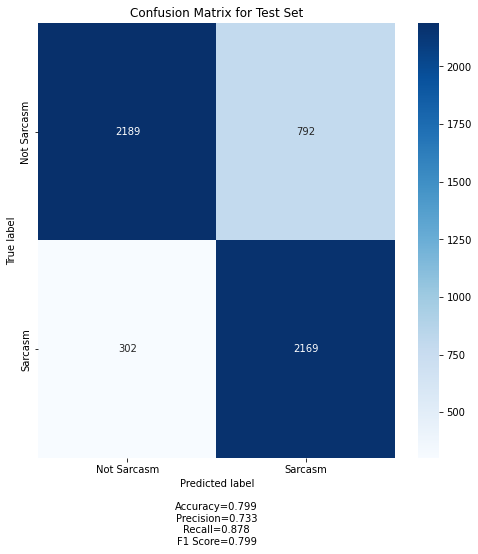

In [ ]:
cf_matrix.make_confusion_matrix(test_cm, figsize=(8,8), categories=labels, percent=False,
                                title = 'Confusion Matrix for Test Set')